<a href="https://colab.research.google.com/github/DesaData/DesaData/blob/main/Copy_of_Bank_Analtytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [47]:
df = pd.read_csv('HFB 2020 2024.csv')

In [48]:
df['Year'] = pd.to_datetime(df['Year'])

In [49]:
df.head()

,Year,Total Income,Total Expenses,Net Interest Income,PBT,PAT,Loans,Deposits,Share Capital,Total Equity and Liabilities
0,2024-06-30,402818.32,326858.47,128519.13,75959.86,71133.36,1084747.42,1714493.75,158600,2339530.32
1,2023-06-30,329781.79,250038.25,120067.17,79743.54,65134.63,995740.21,1611163.68,122000,2144099.02
2,2022-06-30,258099.20,182806.29,96134.15,75292.92,58459.81,777940.57,1118614.35,122000,1619849.70
3,2021-06-30,191477.51,141255.88,80751.01,50221.63,40974.89,674332.02,817933.66,122000,1304156.92
4,2020-06-30,151325.47,126143.76,83930.83,25181.70,20689.43,550608.76,654162.28,122000,1108036.48


<Axes: >

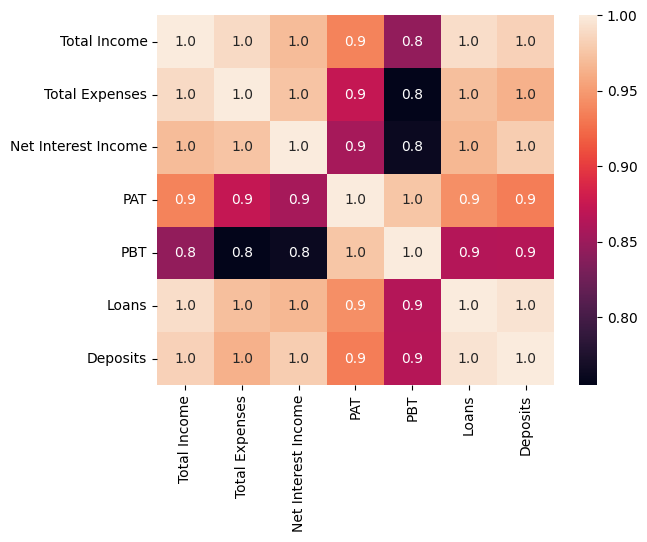

In [50]:
data = df[['Total Income', 'Total Expenses', 'Net Interest Income', 'PAT', 'PBT', 'Loans', 'Deposits']]
import seaborn as sns
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.1f')

In [51]:
 X = df[['Total Income', 'Total Expenses', 'Net Interest Income', 'PAT', 'Loans', 'Deposits']]
 y = df['PBT']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [54]:
#Linear##

In [55]:

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV # Import GridSearchCV
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_score_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('mae_train:', round(mae_train, 2))
print('r2_score_train:', round(r2_score_train, 2))
print('rmse_train:', round(rmse_train, 2))

mae_train: 0.0
r2_score_train: 1.0
rmse_train: 0.0


In [57]:

y_pred_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_score_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('mae_test:', round(mae_test, 2))
print('r2_score_test:', round(r2_score_test, 2))
print('rmse_test:', round(rmse_test, 2))

mae_test: 14832.28
r2_score_test: 0.6
rmse_test: 15720.91


In [58]:


import ipywidgets as widgets
from IPython.display import display
import pandas as pd  # Import pandas
from ipywidgets import interact

# Create the slider widget
Year_slider = widgets.IntSlider(min=2025, max=2030, step=1, value=2025, description="Year")

# Define the function to predict profit
def predict_profit(Year):
    # Assuming df is defined somewhere in your code
    new_data = {
        'Total Income': [402818.32 + Year * (402818.32 / len(df))],
        'Total Expenses': [326858.47 + Year * (326858.47 / len(df))],
        'Net Interest Income': [128519.13 + Year * (128519.13 / len(df))],
        'PAT': [71133.36 + Year * (71133.36 / len(df))],
        'Loans': [1084747.42 + Year * (1084747.42 / len(df))],
        'Deposits': [1714493.75 + Year * (1714493.75 / len(df))]
    }

    # Convert the new data to a DataFrame
    new_df = pd.DataFrame(new_data)

    # Predict PBT using the model
    predicted_PBT = model.predict(new_df)

    # Print the predicted PBT
    print(f"The PBT for {Year} is {predicted_PBT[0]:.2f}")

# Create the interactive widget
widgets.interactive(predict_profit, Year=Year_slider)


interactive(children=(IntSlider(value=2025, description='Year', max=2030, min=2025), Output()), _dom_classes=(…